# Medical Data Visualizer

## The final code is in the cell below

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv(
    "medical_examination.csv")

# Add 'overweight' column
df["overweight"] = df["weight"] / ((df["height"]/100)**2)
# Normalize values to 1 or 0
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1
df.astype({'overweight': 'int64'})


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, "cholesterol"] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, "gluc"] = 1  

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars="cardio", value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.value_counts().reset_index(name="total")
    

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order= ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])


    # Get the figure for the output
    fig = fig.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))
    ]
    
    # Calculate the correlation matrix
    corr = df_heat.corr(method="pearson").round(1)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize= (12, 12))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr, mask=mask, annot=True, center=0, vmin=-0.12, vmax=0.28, fmt='0.1f', linewidths=0.2)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


## Below this is my working for the problem

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv(
    "medical_examination.csv")

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
#create a new column with the BMI of every patient
df["overweight"] = df["weight"] / ((df["height"]/100)**2)


df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1 # df.loc[df['overweight'] > 25, 'overweight'] / df.loc[df['overweight'] > 25, 'overweight']
# Locate, in the overweight table in the dataframe, each row where the  variable 
# "overweight > 25" is True. Then Assign the RHS to all those rows
df.astype({'overweight': 'int64'})

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [3]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, "cholesterol"] = 1   

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0.0


In [4]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, "gluc"] = 1

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


In [5]:
df.melt(id_vars="cardio", value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
#value_vars specifies which data to keep in the pivoted table

#So after this, there should be one long table centered on "cardio". The relationship of "cardio" to the other variables
#chosen. Like "cardio" is the trunk of a tree.
# Every intersection
#(e.g. start with cardio of patient 0, and then the "variable" chosen (e.g. cholesterol) and what the value of that variable is.
# It goes through all the cholesterol values for all the patients, and then it starts again at patient 0 for the variable "overweight", depending on which variables we have chosen to include

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
...,...,...,...
419995,0,overweight,1.0
419996,1,overweight,1.0
419997,1,overweight,1.0
419998,1,overweight,1.0


In [6]:
df_cat = pd.melt(df, id_vars="cardio", value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
#this includes all the idvars selected, and then relates them to "cardio" and shows us that value

In [7]:
df_cat = df_cat.value_counts().reset_index(name="total")
#counts all the unique values (and combinations) in the df. 
# So for eg., we get all the folks with cardio=1, alco=0, then later those with cardio=1 and smoke=0
#look up this method (reset_index)... 
#Make a new column with the total number of each unique combination

In [9]:
print(df_cat)

    cardio     variable  value  total
0        1         alco    0.0  33156
1        0         alco    0.0  33080
2        1        smoke    0.0  32050
3        0        smoke    0.0  31781
4        0         gluc    0.0  30894
5        0  cholesterol    0.0  29330
6        0       active    1.0  28643
7        1         gluc    0.0  28585
8        1       active    1.0  27618
9        1   overweight    1.0  24440
10       1  cholesterol    0.0  23055
11       0   overweight    1.0  19106
12       0   overweight    0.0  15915
13       1  cholesterol    1.0  11924
14       1   overweight    0.0  10539
15       1       active    0.0   7361
16       1         gluc    1.0   6394
17       0       active    0.0   6378
18       0  cholesterol    1.0   5691
19       0         gluc    1.0   4127
20       0        smoke    1.0   3240
21       1        smoke    1.0   2929
22       0         alco    1.0   1941
23       1         alco    1.0   1823


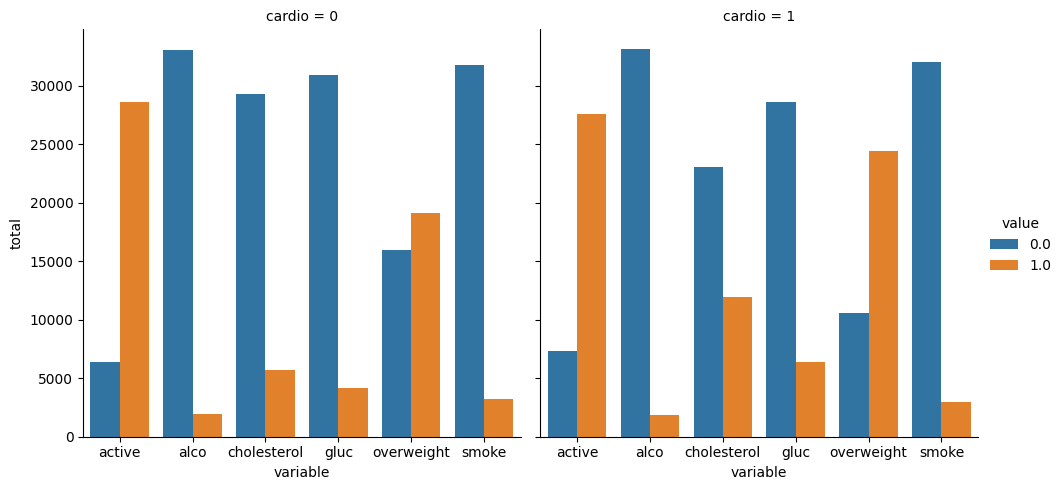

In [8]:
fig = sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", order= ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
#Look up catplot for understanding arguments 
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# Scroll down to bar

fig = fig.fig

In [9]:

#clean the data for analysis: 
#Filter out the following patient segments that represent incorrect data:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))


df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
df_heat = df.loc[df["height"] >= df["height"].quantile(0.025)]
df_heat = df.loc[df["height"] <= df["height"].quantile(0.975)]
df_heat = df.loc[df["weight"] >= df["weight"].quantile(0.025)]
df_heat = df.loc[df["weight"] <= df["weight"].quantile(0.975)]

df_heat.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 68387 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68387 non-null  int64  
 1   age          68387 non-null  int64  
 2   sex          68387 non-null  int64  
 3   height       68387 non-null  int64  
 4   weight       68387 non-null  float64
 5   ap_hi        68387 non-null  int64  
 6   ap_lo        68387 non-null  int64  
 7   cholesterol  68387 non-null  int64  
 8   gluc         68387 non-null  int64  
 9   smoke        68387 non-null  int64  
 10  alco         68387 non-null  int64  
 11  active       68387 non-null  int64  
 12  cardio       68387 non-null  int64  
 13  overweight   68387 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.8 MB


<AxesSubplot: >

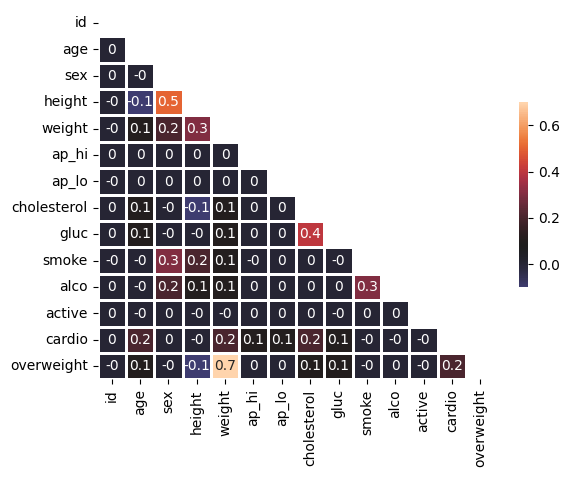

In [23]:

heatmap_big = df_heat.corr(method="pearson").round(1)

#create an array of ones the size of heatmap_big, (make the values 1 boolean, so True) then triu returns only the upper triangle of an array.
mask = np.triu(np.ones_like(heatmap_big, dtype=bool))

fig, ax = plt.subpotsfigsize= (12, 12)


sns.heatmap(heatmap_big, mask=mask, linewidths = 1, annot=True, center = 0.08, cbar_kws = {"shrink":0.5})

#ORDER OF THIS MIGHT BE WRONG, even if the concept is pretty much straight up 

In [22]:
print(heatmap_big)

              id  age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
id           1.0  0.0  0.0    -0.0    -0.0    0.0   -0.0          0.0   0.0   
age          0.0  1.0 -0.0    -0.1     0.1    0.0    0.0          0.1   0.1   
sex          0.0 -0.0  1.0     0.5     0.2    0.0    0.0         -0.0  -0.0   
height      -0.0 -0.1  0.5     1.0     0.3    0.0    0.0         -0.1  -0.0   
weight      -0.0  0.1  0.2     0.3     1.0    0.0    0.0          0.1   0.1   
ap_hi        0.0  0.0  0.0     0.0     0.0    1.0    0.0          0.0   0.0   
ap_lo       -0.0  0.0  0.0     0.0     0.0    0.0    1.0          0.0   0.0   
cholesterol  0.0  0.1 -0.0    -0.1     0.1    0.0    0.0          1.0   0.4   
gluc         0.0  0.1 -0.0    -0.0     0.1    0.0    0.0          0.4   1.0   
smoke       -0.0 -0.0  0.3     0.2     0.1   -0.0    0.0          0.0  -0.0   
alco         0.0 -0.0  0.2     0.1     0.1    0.0    0.0          0.0   0.0   
active       0.0 -0.0  0.0    -0.0    -0.0    0.0   